<font color = dark >

## Home Task

</font>

Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use elbow method to determine the best k for Kmeans


<font color = dark >

## Data

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_blobs

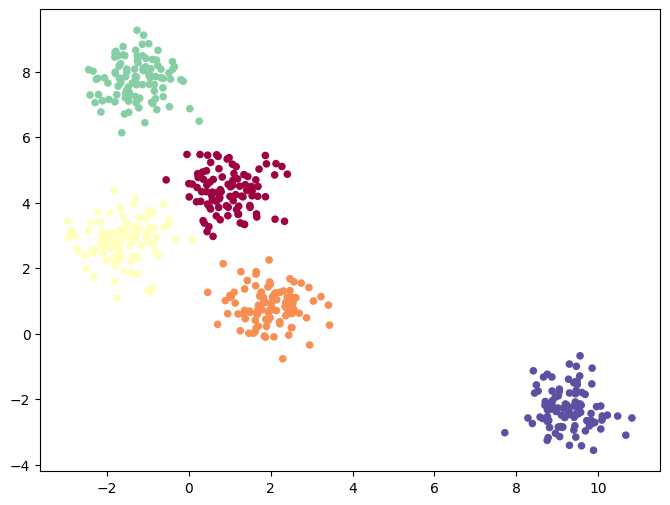

In [14]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5,
                  cluster_std=0.6, random_state=0)

colors = np.array([plt.cm.Spectral(val) for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:,1], c= colors[y], s= 20) 

<font color = dark >

## 1.Agglomerative clustering using `complete` linkage 

In [15]:
from sklearn.cluster import AgglomerativeClustering

Start data:


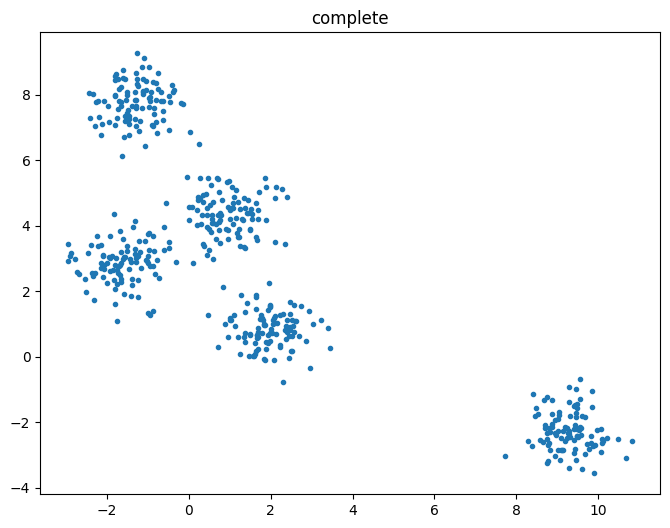

In [16]:
points = X
print("Start data:")
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], marker='.')
plt.title('complete')

clf = AgglomerativeClustering(n_clusters=5, linkage='complete')
predicted = clf.fit_predict(points)

Text(0.5, 1.0, 'complete')

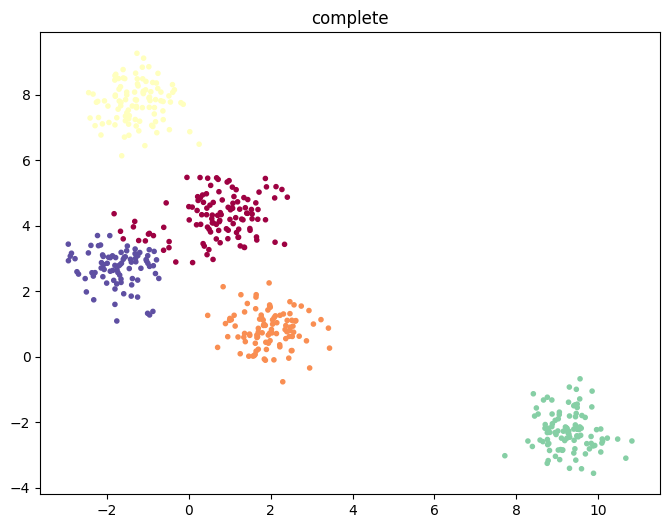

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], c=colors[predicted], marker='.')
plt.title('complete')

<font color = dark >

## 2.Agglomerative clustering using `single` linkage 

Start data:


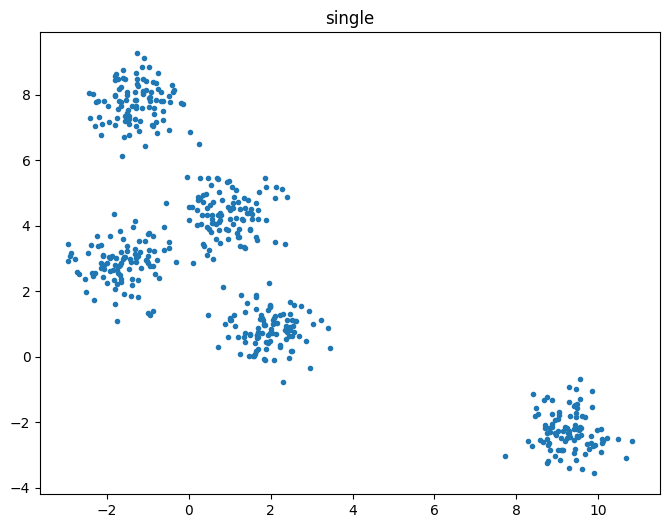

In [18]:
points = X
print("Start data:")
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], marker='.')
plt.title('single')

clf = AgglomerativeClustering(n_clusters=5, linkage='single')
predicted = clf.fit_predict(points)

Text(0.5, 1.0, 'single')

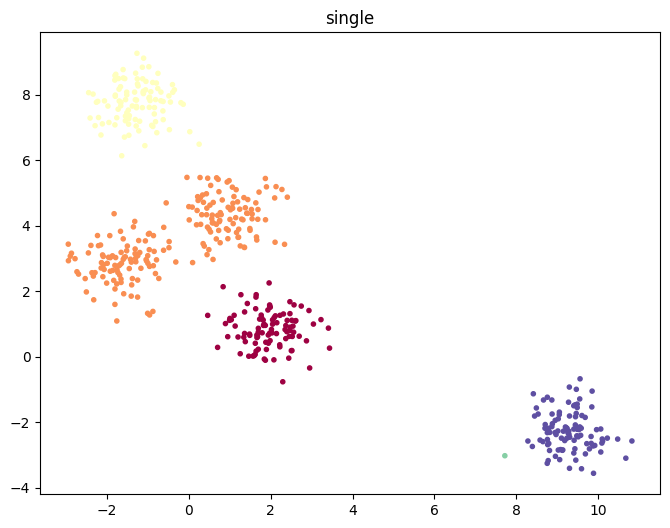

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], c=colors[predicted], marker='.')
plt.title('single')

<font color = dark >

## 3.DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

Estimated number of clusters: 5
Estimated number of noise points: 41


Text(0.5, 1.0, 'Estimated number of clusters: 5')

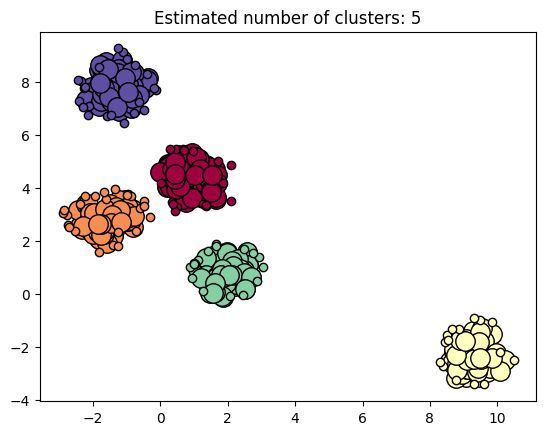

In [21]:
plt.figure()

db = DBSCAN(eps=0.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

unique_labels = set(labels)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

<font color = dark >

## Use elbow methiod to determine the best k for Kmeans

In [22]:
from sklearn.cluster import KMeans

## WCSS

In [23]:
WCSS = []

for i in range(1,8):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    WCSS.append(wcss_iter)
    
WCSS

C:\Users\38098\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\38098\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\38098\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

[13801.118960595786,
 3798.066418695318,
 1646.0255144100242,
 787.0676994559476,
 343.87590333156646,
 314.6023050439456,
 289.6476238032392]

## The elbow method

Text(0, 0.5, 'Within-cluster Sum of Squares')

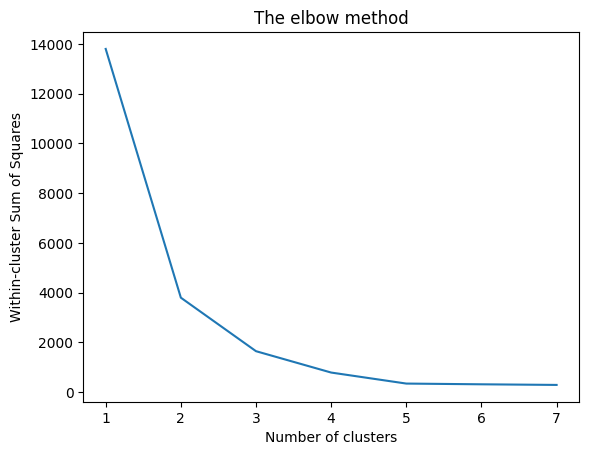

In [24]:
number_clusters = range(1,8)
plt.plot(number_clusters,WCSS)

plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')